# 요구사항 분석 및 문제 정의

- 간단한 EDA와 관련된 함수를 학습
- BMI 데이터를 확인해 보고 잘 분류가 될 수 있는지 시각화
- KNN의 개념에 대해 학습
- KNN을 이용해서 학습
- 머신러닝 프로세스에 대해 학습

# 데이터 수집

In [19]:
import pandas as pd

bmi = pd.read_csv("./data/bmi_500.csv")

# EDA (탐색적 데이터 분석)

In [5]:
# 처음부터 일부 데이터를 확인
# 괄호안에 숫자를 입력하면 해당 숫자만큼 출력
bmi.head(9)

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
5,Male,189,104,Overweight
6,Male,147,92,Extreme Obesity
7,Male,154,111,Extreme Obesity
8,Male,174,90,Overweight


In [4]:
# 끝에서부터 일부 데이터를 확인
bmi.tail()

,Gender,Height,Weight,Label
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity
499,Male,173,131,Extreme Obesity


In [6]:
# 데이터의 정보를 출력하는 함수
# 데이터의 수, 컬럼의 수, 컬럼의 특성/데이터 타입 - 결측치 확인
# Dtype : object(범주형), int / float (수치형)
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [8]:
# 범주형 컬럼의 클래스의 목록을 출력하는 함수
print(bmi["Gender"].unique())

['Male' 'Female']


In [9]:
# 범주형 컬럼의 클래스별 갯수를 확인
# 데이터가 한쪽으로 치우쳐 있는 확인
print(bmi["Gender"].value_counts())

Female    255
Male      245
Name: Gender, dtype: int64


In [11]:
# 수치형 데이터의 편향 (치우침)을 확인하는 함수
# 0이면 정규분포
# 양수이면 왼쪽으로 치우친 데이터이고 음수이면 오른쪽으로 치우친 데이터를 표시
print(bmi["Height"].skew())
print(bmi["Weight"].skew())

-0.12191368980139153
-0.037692236922098034


In [12]:
# 데이터의 간단한 기술통계를 보여주는 함수
# 데이터의 개수, 평균, 표준편차, 최소값/25%/중간값/75%/최대값
# 결측치, 이상치, 편향 (치우침정도)
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


## BMI 데이터가 분류가 될 수 있는 데이터인지 확인

In [13]:
# matplotlib : 파이썬 그래프 시각화 도구
# seaborn : matplotlib에 고급 그래프 시각화 도구를 제공
import matplotlib.pyplot as plt

# scatter : 산포도를 그리는 함수 (2차원 좌표에 점을 찍을 찍는 함수)
# x 좌표 : Weight, y 좌표 : Height
def myScatter(label, color) :
    # 파라미터로 넘어온 라벨의 해당 값들을 저장 - 불리언 인덱싱
    tmp = bmi[bmi["Label"] == label]
    
    # 입력한 라벨값만 산포도를 그림
    # scatter(x좌표, y좌표, 색상, 라벨)
    plt.scatter(tmp["Weight"], tmp["Height"],
                c = color, label = label)

In [14]:
bmi["Label"].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

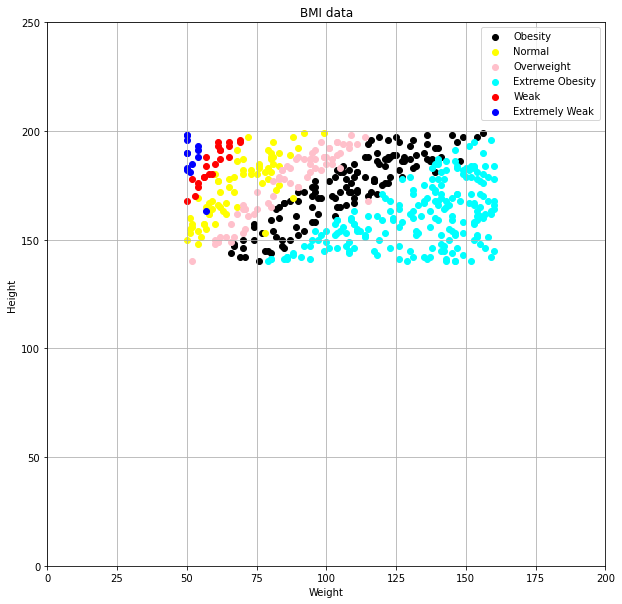

In [32]:
# 그래프의 크기 설정
plt.figure(figsize=(10, 10))

myScatter("Obesity", "black")
myScatter("Normal", "yellow")
myScatter("Overweight", "pink")
myScatter("Extreme Obesity", "cyan")
myScatter("Weak", "red")
myScatter("Extremely Weak", "blue")

# 범례 추가 (loc : 범례의 위치)
# loc를 써주지 않으면 알아서 데이터가 가장 작게 분포된 위치에 표시
plt.legend(loc="upper right")

# x축 라벨 표시 (기본적으로 한글은 지원하지 않음)
plt.xlabel("Weight")

# y축 라벨 표시 
plt.ylabel("Height")

# x축 눈금의 범위
plt.xlim(0, 200)

# y축 눈금의 범위
plt.ylim(0, 250)

# 제목 표시
plt.title("BMI data")

# 격자 표시
plt.grid()

## 학습 데이터로 변환

- 특성데이터와 라벨데이터로 분리
- 훈련데이터와 테스트데이터로 분리

In [2]:
# 특성데이터와 라벨데이터로 분리
bmi_X = bmi.loc[:, "Height":"Weight"]
bmi_y = bmi.loc[:, "Label"]

bmi_X.shape, bmi_y.shape

((500, 2), (500,))

In [4]:
# 훈련데이터와 테스트데이터로 분리 (훈련 70%, 테스트 30%)
X_train = bmi_X.iloc[:350, :]
y_train = bmi_y.iloc[:350]
X_test = bmi_X.iloc[350:, :]
y_test = bmi_y.iloc[350:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((350, 2), (350,), (150, 2), (150,))

# KNN으로 BMI 데이터 학습

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# n_neighbors : 이웃의 수
# 이웃의 수가 적으면 과대적합
# 이웃의 수가 많으면 과소적합
# Hyper Parameter Tuning : 적당한 이웃의 수를 결정하는 것
knn_model = KNeighborsClassifier(n_neighbors=3)
# 훈련은 훈련데이터로
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
# 정확도 계산
# 훈련정확도와 테스트정확도가 모두 낮으면 -> 과소적합
# 훈련정확도보다 테스트정확도가 높으면 -> 과소적합
# 훈련정확도와 테스트정확도가 크게 차이나면 -> 과대적합
# 일반화모델 : 훈련정확도가 테스트정확도가 약간 높은 모델
print("훈련 정확도 : ", knn_model.score(X_train, y_train))
print("테스트 정확도 : ", knn_model.score(X_test, y_test))

훈련 정확도 :  0.9342857142857143
테스트 정확도 :  0.9


- 이웃의 수가 감소하면 과대적합이 생김

In [7]:
knn_model2 = KNeighborsClassifier(n_neighbors=1)
knn_model2.fit(X_train, y_train)

print("훈련 정확도 : ", knn_model2.score(X_train, y_train))
print("테스트 정확도 : ", knn_model2.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.8933333333333333


- 이웃의 수가 증가하면 과소적합이 생김

In [8]:
knn_model3 = KNeighborsClassifier(n_neighbors=10)
knn_model3.fit(X_train, y_train)

print("훈련 정확도 : ", knn_model3.score(X_train, y_train))
print("테스트 정확도 : ", knn_model3.score(X_test, y_test))

훈련 정확도 :  0.9085714285714286
테스트 정확도 :  0.94


- 일반화된 모델을 찾아보자 - 하이퍼파라미터 튜닝

In [9]:
# 이웃의 수마다의 정확도
train_acc = []
test_acc = []

# 사용할 이웃의 범위 값들을 정의
neighbor = range(1, 20)

for n in neighbor :
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    
    # 이웃의 수마다의 훈련데이터 정확도와 테스트데이터 정확도를 리스트에 저장
    train_acc.append(knn_model.score(X_train, y_train))
    test_acc.append(knn_model.score(X_test, y_test))

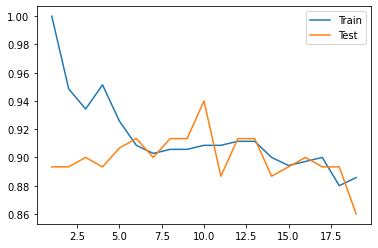

In [10]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(neighbor, train_acc, label="Train")
plt.plot(neighbor, test_acc, label="Test")
plt.legend()

- 특성의 수를 증가시켜서 과소적합을 줄여보자

In [21]:
import pandas as pd

bmi = pd.read_csv("./data/bmi_500.csv")

bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [22]:
# Gender 컬럼에서 Male -> 0으로 Female -> 1로 변경
bmi["Gender"] = bmi["Gender"].map({"Male":0, "Female":1})

bmi.head()

,Gender,Height,Weight,Label
0,0,174,96,Obesity
1,0,189,87,Normal
2,1,185,110,Obesity
3,1,195,104,Overweight
4,0,149,61,Overweight


In [23]:
# 특성데이터와 라벨데이터로 분리
bmi_X = bmi.loc[:, "Gender":"Weight"]
bmi_y = bmi.loc[:, "Label"]

bmi_X.shape, bmi_y.shape

((500, 3), (500,))

In [24]:
# 훈련데이터와 테스트데이터로 분리 (훈련 70%, 테스트 30%)
X_train = bmi_X.iloc[:350, :]
y_train = bmi_y.iloc[:350]
X_test = bmi_X.iloc[350:, :]
y_test = bmi_y.iloc[350:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((350, 3), (350,), (150, 3), (150,))

In [25]:
# 이웃의 수마다의 정확도
train_acc = []
test_acc = []

# 사용할 이웃의 범위 값들을 정의
neighbor = range(1, 20)

for n in neighbor :
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    
    # 이웃의 수마다의 훈련데이터 정확도와 테스트데이터 정확도를 리스트에 저장
    train_acc.append(knn_model.score(X_train, y_train))
    test_acc.append(knn_model.score(X_test, y_test))

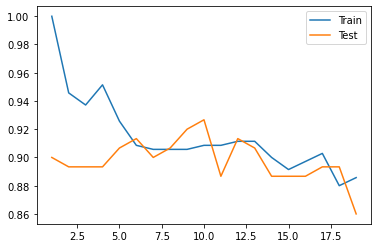

In [26]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(neighbor, train_acc, label="Train")
plt.plot(neighbor, test_acc, label="Test")
plt.legend()

- 특성들끼리 각각 곱해서 새로운 특성을 추가

In [27]:
X_train2 = X_train.copy()

# 컬럼의 이름들을 가져온다
col = X_train2.columns

for i in range(col.size) :
    for j in range(i, col.size) :
        X_train2[col[i] + "x" + col[j]] = X_train2[col[i]] * X_train2[col[j]]
        
X_train2.head()        

,Gender,Height,Weight,GenderxGender,GenderxHeight,GenderxWeight,HeightxHeight,HeightxWeight,WeightxWeight
0,0,174,96,0,0,0,30276,16704,9216
1,0,189,87,0,0,0,35721,16443,7569
2,1,185,110,1,185,110,34225,20350,12100
3,1,195,104,1,195,104,38025,20280,10816
4,0,149,61,0,0,0,22201,9089,3721


In [28]:
X_test2 = X_test.copy()

# 컬럼의 이름들을 가져온다
col = X_test2.columns

for i in range(col.size) :
    for j in range(i, col.size) :
        X_test2[col[i] + "x" + col[j]] = X_test2[col[i]] * X_test2[col[j]]
        
X_test2.head()  

,Gender,Height,Weight,GenderxGender,GenderxHeight,GenderxWeight,HeightxHeight,HeightxWeight,WeightxWeight
350,0,184,83,0,0,0,33856,15272,6889
351,0,197,88,0,0,0,38809,17336,7744
352,1,160,51,1,160,51,25600,8160,2601
353,0,184,153,0,0,0,33856,28152,23409
354,0,190,50,0,0,0,36100,9500,2500
